In [4]:
%%time
from sklearn import tree
import pandas as pd
#import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 2 ms


Классифицировать есть или нет у пациента заболевание сердца (переменная num),
основываясь на двух признаках: пол (sex) и наличие/отсутсвие стенокардии (exang).

In [11]:
heart_diseases = pd.read_csv('data/train_data_tree.csv')
heart_diseases.head(3)

,sex,exang,num
0,1,1,1
1,1,1,1
2,1,0,1


In [12]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [15]:
x = heart_diseases.drop(['num'],axis = 1)
y = heart_diseases.num

In [17]:
clf.fit(x,y)

DecisionTreeClassifier(criterion='entropy')

[Text(167.4, 181.2, 'exang <= 0.5\nentropy = 0.996\nsamples = 238\nvalue = [128, 110]'),
 Text(83.7, 108.72, 'sex <= 0.5\nentropy = 0.903\nsamples = 157\nvalue = [107, 50]'),
 Text(41.85, 36.23999999999998, 'entropy = 0.612\nsamples = 53\nvalue = [45, 8]'),
 Text(125.55000000000001, 36.23999999999998, 'entropy = 0.973\nsamples = 104\nvalue = [62, 42]'),
 Text(251.10000000000002, 108.72, 'sex <= 0.5\nentropy = 0.826\nsamples = 81\nvalue = [21, 60]'),
 Text(209.25, 36.23999999999998, 'entropy = 0.954\nsamples = 16\nvalue = [6, 10]'),
 Text(292.95, 36.23999999999998, 'entropy = 0.779\nsamples = 65\nvalue = [15, 50]')]

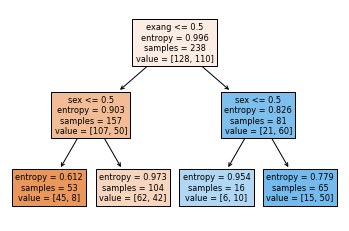

In [19]:
tree.plot_tree(clf, 
               feature_names=list(x), 
               #class_names=['Died','Survived'],  
               filled=True )

In [26]:
#IG = 0.996 - (n1*E1 + n2*E2)/N
#n1 - чило сэмплов слева, n2 - число сэмплов справа, 
#E1 - энтропия слева, Е2 - энтропия справа. N = n1+n2 
IG = 0.996 - 157./238*0.903 - 81./238*0.826
IG

0.11920588235294122

In [27]:
# 0 - индекс корня дерева
l_node = clf.tree_.children_left[0] # индекс корня левого поддерева
r_node = clf.tree_.children_right[0] # индекс корня правого поддерева

n1 = clf.tree_.n_node_samples[l_node] # сэмплов в левом поддереве
n2 = clf.tree_.n_node_samples[r_node] # сэмплов в правом поддереве

e1 = clf.tree_.impurity[l_node] # энтропия в корне левого поддерева
e2 = clf.tree_.impurity[r_node] # энтропия в корне правого поддерева

n = clf.tree_.n_node_samples[0] # суммарное кол-во сэмплов
e = clf.tree_.impurity[0] # энтропия корня дерева

average_child_enthropy = (e1*n1/n) + (e2*n2/n)

information_gain = e - average_child_enthropy
information_gain

0.11939340343891591